In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [12]:
area = [0.8, 2.3, 4.7, 7.1]
precio = [10000, 15000, 40000, 80000]

In [13]:
x = Symbol('x')

In [14]:
gamma_0 = ((x-2.3)*(x-4.7)*(x-7.1))/((0.8-2.3)*(0.8-4.7)*(0.8-7.1))
gamma_0 = gamma_0.expand()
gamma_0
gamma_1 = ((x-0.8)*(x-4.7)*(x-7.1))/((2.3-0.8)*(2.3-4.7)*(2.3-7.1))
gamma_1 = gamma_1.expand()
gamma_1
gamma_2 = ((x-2.3)*(x-0.8)*(x-7.1))/((4.7-2.3)*(4.7-0.8)*(4.7-7.1))
gamma_2 = gamma_2.expand()
gamma_2
gamma_3 = ((x-2.3)*(x-4.7)*(x-0.8))/((7.1-2.3)*(7.1-4.7)*(7.1-0.8))
gamma_3 = gamma_3.expand()
gamma_3
P = 10000*gamma_0 +  15000*gamma_1 + 40000*gamma_2 + 80000*gamma_3
P_np = lambdify(x,P,'numpy')
area = np.array([0.8, 2.3, 4.7, 7.1])
precio = np.array([10000, 15000, 40000, 80000])

In [15]:
c1 = (precio[1]- precio[0])/(area[1]-area[0])
c2 = (precio[2] - precio[0] - c1*(area[2]-area[0]))/((area[2]-area[0])*(area[2] - area[1]))
c3 = (precio[3]-precio[0]-c1*(area[3]-area[0])-c2*(area[3]-area[0])*(area[3]-area[1]))/((area[3]-area[0])*(area[3]-area[1])*(area[3]-area[2]))

In [16]:
c1

3333.333333333334

In [17]:
P0 = precio[0]
P1 = precio[0]+c1*(x-area[0])
P2 = precio[0]+c1*(x-area[0]) + c2*(x-area[1])*(x-area[0])
P3 = precio[0]+c1*(x-area[0]) + c2*(x-area[1])*(x-area[0]) + c3*(x-area[2])*(x-area[1])*(x-area[0])
P3_np = lambdify(x, P3, 'numpy')

25201.92307692308

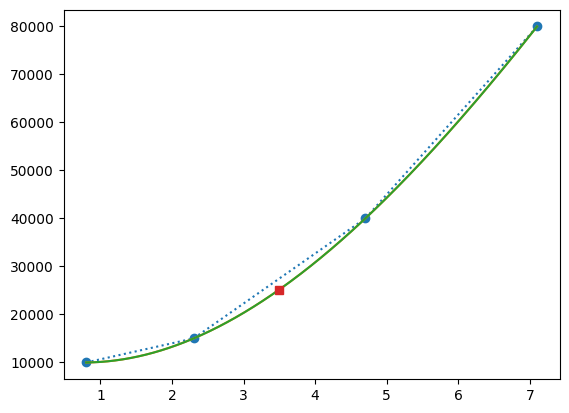

In [19]:
import matplotlib.pyplot as plt

t = np.linspace(0.8, 7.1, 1000)

figua01 = plt.figure()
plt.plot(area, precio, 'o:')
plt.plot(t, P_np(t))
plt.plot(t, P3_np(t))
plt.plot(3.5,P_np(3.5), 's')
P_np(3.5)

In [20]:
P

-81.6120607787273*x**3 + 2452.81339031339*x**2 - 3636.26246438746*x + 11380.9947768281

In [23]:
P3.expand()

-81.6120607787271*x**3 + 2452.81339031339*x**2 - 3636.26246438745*x + 11380.9947768281